<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg">

## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course
    
Authors: [Ilya Baryshnikov](https://www.linkedin.com/in/baryshnikov-ilya/), [Maxim Uvarov](https://www.linkedin.com/in/maxis42/), and [Yury Kashnitsky](https://yorko.github.io). Translated and edited by [Inga Kaydanova](https://www.linkedin.com/in/inga-kaidanova-a92398b1/), [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2 (demo)
## <center>Analyzing cardiovascular disease data 

In this assignment, you will answer questions about a dataset on cardiovascular disease. You do not need to download the data: it is already in the repository. There are some Tasks that will require you to write code. Complete them and then answer the questions in the [form](https://docs.google.com/forms/d/13cE_tSIb6hsScQvvWUJeu1MEHE5L6vnxQUbDYpXsf24). 

#### Problem

Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

#### Data description

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

Let's get to know our data by performing a preliminary data analysis.

#  Part 1. Preliminary data analysis

First, we will initialize the environment:

In [1]:
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

You will use the `seaborn` library for visual analysis, so let's set that up too:

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

To make it simple, we will work only with the training part of the dataset:

In [3]:
df = pd.read_csv('../input/mlbootcamp5_train.csv')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


It would be instructive to peek into the values of our variables.
 
Let's convert the data into *long* format and depict the value counts of the categorical features using [`factorplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html).

In [4]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1
...,...,...
489995,cardio,0
489996,cardio,1
489997,cardio,1
489998,cardio,1


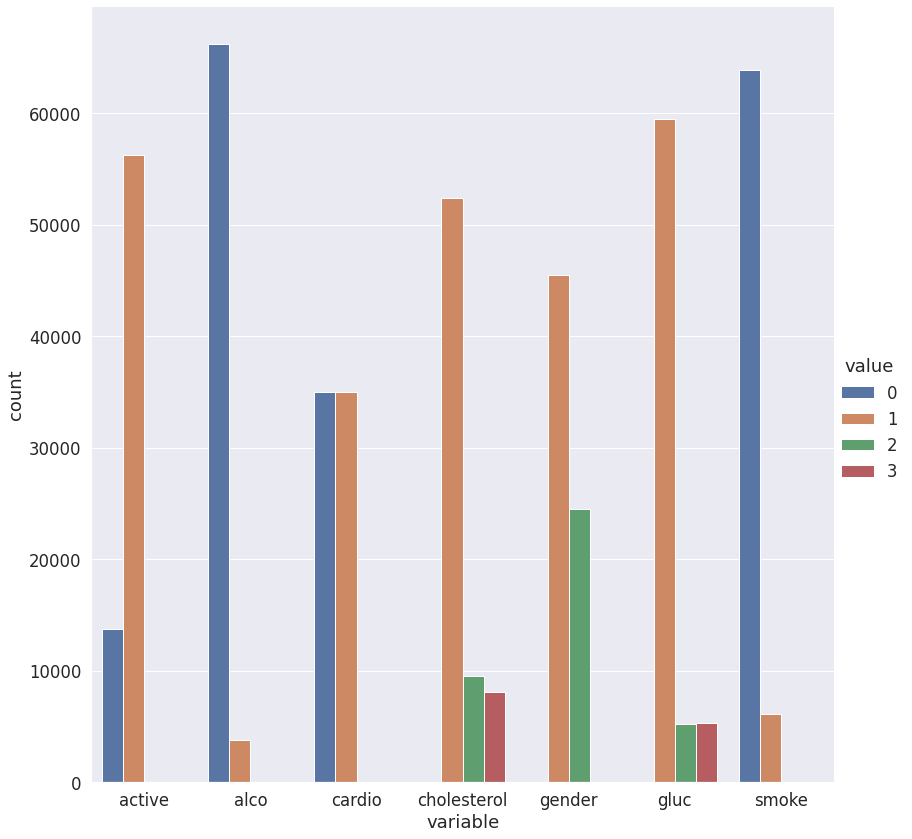

In [5]:
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

We can see that the target classes are balanced. That's great!

Let's split the dataset by target values. Can you already spot the most significant feature by just looking at the plot?

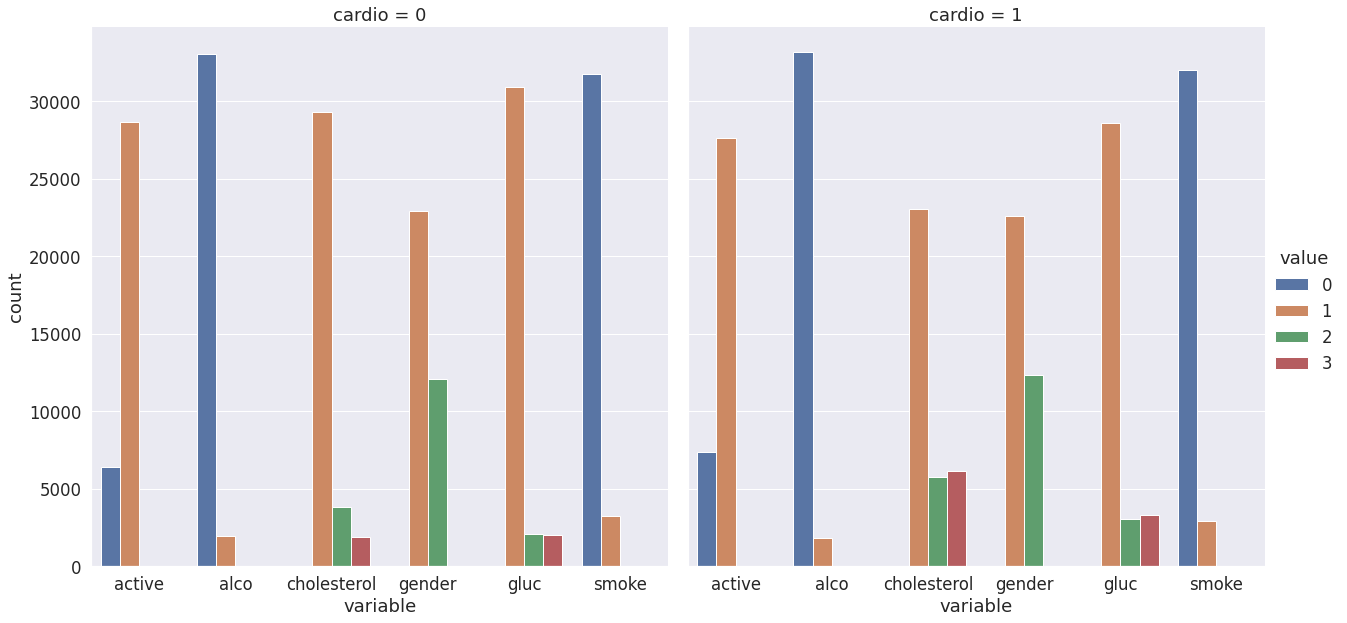

In [6]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

You can see that the distribution of cholesterol and glucose levels great differs by the value of the target variable. Is this a coincidence?

Now, let's calculate some statistics for the feature unique values:

In [7]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In the end, we have:
- 5 numerical features (excluding *id*);
- 7 categorical features;
- 70000 records in total.

## 1.1. Basic observations

**Question 1.1. (1 point). How many men and women are present in this dataset? Values of the `gender` feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.**
1. 45530 women and 24470 men
2. 45530 men and 24470 women
3. 45470 women and 24530 men
4. 45470 men and 24530 women

<AxesSubplot:xlabel='gender', ylabel='weight'>

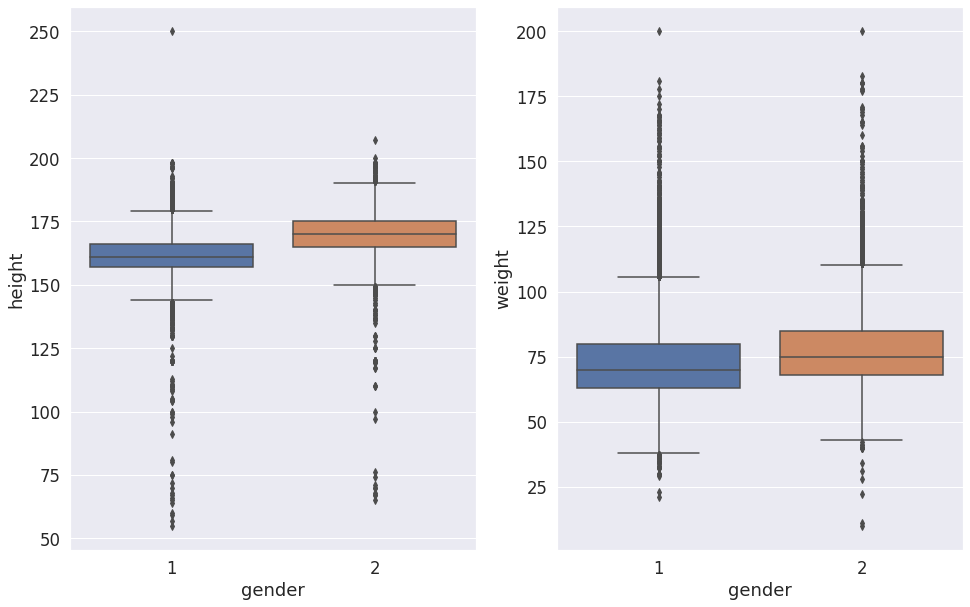

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16, 10))
sns.boxplot(x='gender', y='height', data=df, ax=ax[0])
sns.boxplot(x='gender', y='weight', data=df, ax=ax[1])

As we can see, entries with `gender` feature equal to 2 have a higher height and more weight, but lets have a look at average height for both classes

<AxesSubplot:xlabel='gender', ylabel='height'>

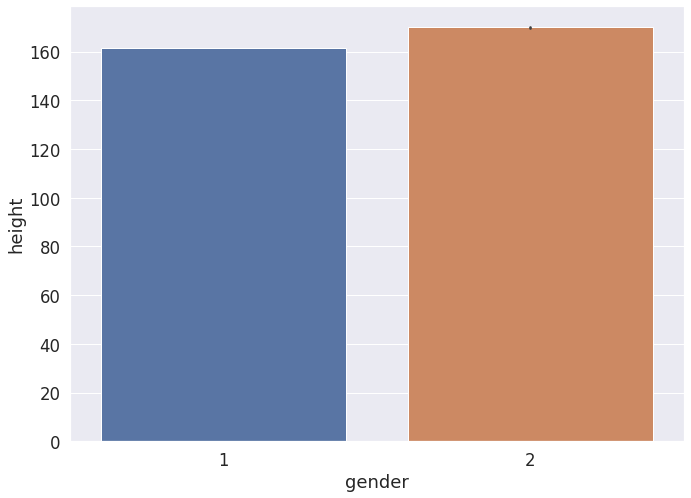

In [9]:
sns.barplot(x='gender', y='height', data=df)

We conclude that value 2 correspond to **men** and 1 to **women**. Now we can count number of entries for each gender:

In [10]:
print(df.gender.value_counts())

1    45530
2    24470
Name: gender, dtype: int64


**Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women?**
1. women
2. men

<AxesSubplot:xlabel='alco', ylabel='count'>

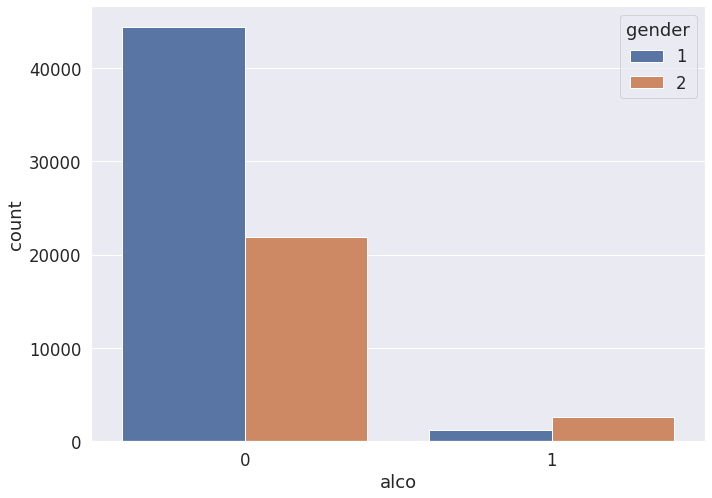

In [11]:
sns.countplot(x='alco', hue='gender', data=df)

**Men**, of course, reports about consuming alcohol more often

**Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)?**
1. 4
2. 16
3. 20
4. 24

In [12]:
(pd.crosstab(df['gender'], df['smoke'], normalize='index') * 100).round()

smoke,0,1
gender,,
1,98.0,2.0
2,78.0,22.0


We see that smokers among men compose 22 percent and among women - 2 percent. So, the difference is 22-2=**20%**

**Question 1.4. (1 point). What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature `age` in this dataset.**

1. 5
2. 10
3. 15
4. 20

The feature `age` was measured in days, but we need to convert it into months. So we can use formula: **days * 0.032855 = months**

In [13]:
df['age_months'] = np.round(df['age'] * 0.032855)
df.groupby('smoke').agg({'age_months':'median'}).rename(columns={'age_months':'median age'})

,median age
smoke,
0,648.0
1,628.0


The difference is 648-628=**20**

## 1.2. Risk maps
### Task:

On the website for the European Society of Cardiology, a [SCORE scale](https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts) is provided. It is used for calculating the risk of death from a cardiovascular decease in the next 10 years. Here it is:

<img src=https://habrastorage.org/webt/ik/gx/hr/ikgxhr3w1vzqihgitgrbdorfb14.png width=90%>

Let's take a look at the upper-right rectangle, which shows a subset of smoking men aged from 60 to 65. (It's not obvious, but the values in the figure represent the upper bound).

We see the value 9 in the lower-left corner of the rectangle and 47 in the upper-right. This means that, for people in this gender-age group whose systolic pressure is less than 120, the risk of a CVD is estimated to be 5 times lower than for those with the pressure in the interval [160,180).

Let's calculate that same ratio using our data.

Clarifications:
- Calculate ``age_years`` feature – round age to the nearest number of years. For this task, select only the people of age 60 to 64, inclusive.
- Cholesterol level categories differ between the figure and our dataset. The conversion for the ``cholesterol`` feature is as follows: 4 mmol/l $\rightarrow$ 1, 5-7 mmol/l $\rightarrow$ 2, 8 mmol/l $\rightarrow$ 3.

In [14]:
# create new feature
df['age_years'] = df['age'] // 365

# select only needed subset
df_older_people = df[df['age_years'].isin([60, 61, 62, 63, 64])]
df_older_people.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_months,age_years
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,720.0,60
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,727.0,60
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,742.0,61


In [15]:
df_older_people.shape

(13050, 15)

**Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?**

1. 1
2. 2
3. 3
4. 4

In [16]:
# select only smoked men
df_older_men_smokers = df_older_people[(df_older_people['smoke']==1) & (df['gender']==2)]

# select first segment:
## systolic pressure is less than 120
## cholesterol level is equal to 1
df_segment1 = df_older_men_smokers[(df_older_men_smokers['ap_hi'] < 120) & (df_older_men_smokers['cholesterol']==1)]

# select second segment:
## systolic pressure is in the interval [160, 180)
## cholesterol level is equal to 3
df_segment2 = df_older_men_smokers[(df_older_men_smokers['ap_hi'].map(lambda x: x>=160 and x<180)) \
                                                  & (df_older_men_smokers['cholesterol']==3)]

In [17]:
# the fraction of people with CVD among first segment
df_segment1.cardio.value_counts(normalize=True)[1]

0.2777777777777778

In [18]:
# the fraction of people with CVD among second segment
df_segment2.cardio.value_counts(normalize=True)[1]

0.9333333333333333

In [19]:
# the ratio between two groups
df_segment2.cardio.value_counts(normalize=True)[1] / df_segment1.cardio.value_counts(normalize=True)[1]

3.36

We can see that among smoking men in age between 60 and 64:
* 28% of men with low systolic pressure and low cholesterol level have CVD disease
* 93% of men with high systolic pressure and high cholesterol level have CVD disease

## 1.3. Analyzing BMI
### Task:

Create a new feature – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). To do this, divide weight in kilogramms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25. 

In [20]:
df['bmi'] = df['weight'] / ((df['height']/100)**2)
df.bmi

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: bmi, Length: 70000, dtype: float64

In [21]:
df['bmi'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

**Question 1.6. (2 points). Choose the correct statements:**

1. Median BMI in the sample is within the range of normal BMI values.
2. The BMI for women is on average higher than for men.
3. Healthy people have, on average, a higher BMI than the people with CVD.
4. For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

In [22]:
df.bmi.median()

26.374068120774975

Median BMI is **not** in the range of normal

In [23]:
df.groupby('gender')['bmi'].mean()

gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64

It is **true** that the BMI for women on average is higher than for men

In [24]:
df.groupby('cardio')['bmi'].mean()

cardio
0    26.548175
1    28.566061
Name: bmi, dtype: float64

The people with CVD has **higher** BMI (on average) than people without this disease

In [25]:
df_healthy_nondrinking_people = df[(df['alco']==0) & (df['cardio']==0)]
df_healthy_nondrinking_people.groupby('gender')['bmi'].mean()

gender
1    26.845407
2    25.872638
Name: bmi, dtype: float64

It is **true** that average BMI for healthy, non-drinking men is closer to normal than for healthy and non-drinking women.

## 1.4. Cleaning data

### Task:
We can see that the data is not perfect. It contains "dirt" and inaccuracies. We'll see this better as we visualize the data.

Filter out the following patient segments (we consider these as erroneous data)

- diastolic pressure is higher than systolic 
- height is strictly less than 2.5 percentile (Use `pd.Series.quantile` to compute this value. If you are not familiar with the function, please read the docs.)
- height is strictly more than 97.5 percentile
- weight is strictly less than 2.5 percentile
- weight is strictly more than 97.5 percentile

This is not everything that we can do to clean this data, but this is sufficient for now.

In [26]:
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_months,age_years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,604.0,50,21.96712


In [27]:
# select only entries where systolic pressure is not less than diastolic
df_correct = df[df['ap_lo'] <= df['ap_hi']]

In [28]:
# select only entries where height is not less than 2.5 percentile
lower_percentile_for_height = df.height.quantile(.025)
print('2.5 percentile for height is', lower_percentile_for_height)

df_correct = df_correct[df_correct['height']>=lower_percentile_for_height]

2.5 percentile for height is 150.0


In [29]:
# select only entries where height is not more than 97.5 percentile
upper_percentile_for_height = df.height.quantile(.975)
print('97.5 percentile for height is', upper_percentile_for_height)

df_correct = df_correct[df_correct['height']<=upper_percentile_for_height]

97.5 percentile for height is 180.0


In [30]:
# do the same things for weight
lower_percentile_for_weight = df.weight.quantile(.025)
upper_percentile_for_weight = df.weight.quantile(.975)
print('2.5 percentile for weight is', lower_percentile_for_weight)
print('97.5 percentile for weight is', upper_percentile_for_weight)

df_correct = df_correct[df_correct['weight'].map(lambda x: x>=lower_percentile_for_weight and \
                                                           x<=upper_percentile_for_weight)]

2.5 percentile for weight is 51.0
97.5 percentile for weight is 108.0


**Question 1.7. (2 points). What percent of the original data (rounded) did we throw away?**

1. 8
2. 9
3. 10
4. 11

In [31]:
# percent of original data that we throw away
100 - np.round(len(df_correct) / len(df) * 100)

10.0

# Part 2. Visual data analysis

## 2.1. Correlation matrix visualization

To understand the features better, you can create a matrix of the correlation coefficients between the features. Use the initial dataset (non-filtered).

### Task:

Plot a correlation matrix using [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html). You can create the matrix using the standard `pandas` tools with the default parameters.

In [32]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_months,age_years,bmi
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003454,0.003814,-0.001377
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999994,0.999091,0.085512
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.022822,-0.022913,-0.096529
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081531,-0.081506,-0.290642
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053692,0.053561,0.762009
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020764,0.020854,0.024852
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017659,0.017620,0.035345
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154417,0.154012,0.146270
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098693,0.098388,0.101390
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047630,-0.047649,-0.027215


<AxesSubplot:>

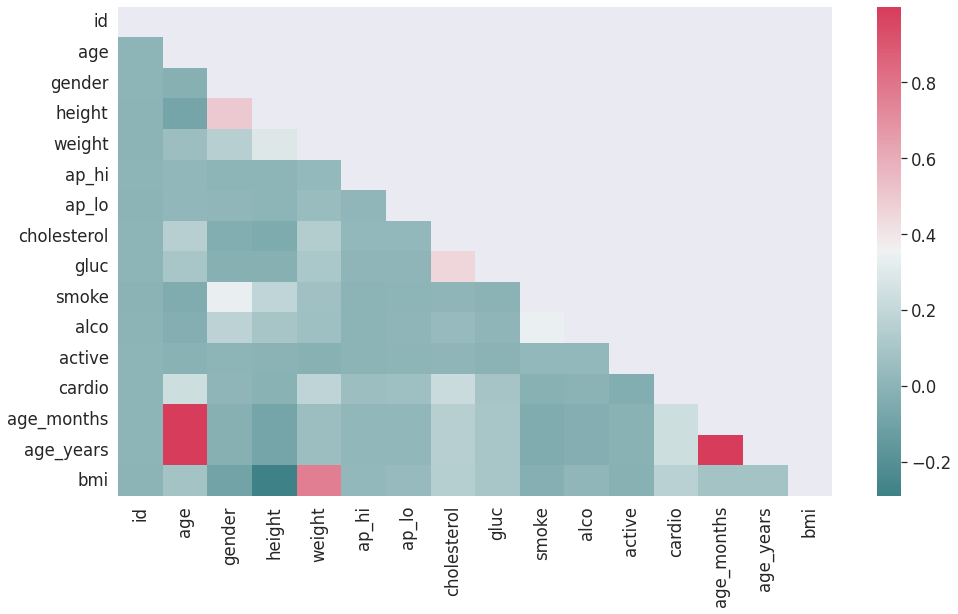

In [33]:
plt.figure(figsize=(16, 9))
cmap = sns.diverging_palette(200, 5, as_cmap=True)
mask = np.zeros(df.corr().shape, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, cmap=cmap)

**Question 2.1. (1 point). Which pair of features has the strongest Pearson's correlation with the *gender* feature?**

1. Cardio, Cholesterol
2. Height, Smoke
3. Smoke, Alco
4. Height, Weight

We see that `height` and `smoke` features has the strongest correlation with `gender` feature

## 2.2. Height distribution of men and women

From our exploration of the unique values earlier, we know that the gender is encoded by the values *1* and *2*. Although you do not know the mapping of these values to gender, you can figure that out graphically by looking at the mean values of height and weight for each value of the *gender* feature.

### Task:

Create a violin plot for the height and gender using [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Use the parameters:
- `hue` to split by gender;
- `scale` to evaluate the number of records for each gender.

In order for the plot to render correctly, you need to convert your `DataFrame` to *long* format using the `melt()` function from `pandas`. Here is [an example](https://stackoverflow.com/a/41575149/3338479) of this for your reference.

<AxesSubplot:xlabel='variable', ylabel='value'>

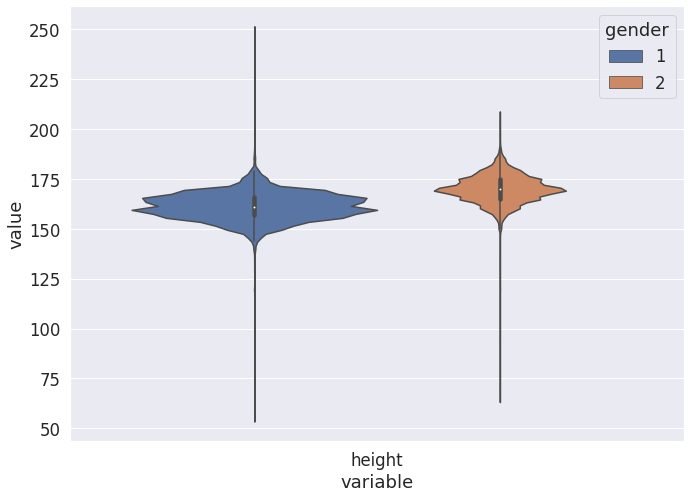

In [34]:
# You code here
df_long = pd.melt(frame=df, id_vars='gender', value_vars=['height'])
sns.violinplot(x='variable', y='value', data=df_long, hue='gender', scale='count')

## 2.3. Rank correlation

In most cases, *the Pearson coefficient of linear correlation* is more than enough to discover patterns in data. 
But let's go a little further and calculate a [rank correlation](https://en.wikipedia.org/wiki/Rank_correlation). It will help us to identify such feature pairs in which the lower rank in the variational series of one feature always precedes the higher rank in the another one (and we have the opposite in the case of negative correlation).

### Task:

Calculate and plot a correlation matrix using the [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).


<AxesSubplot:>

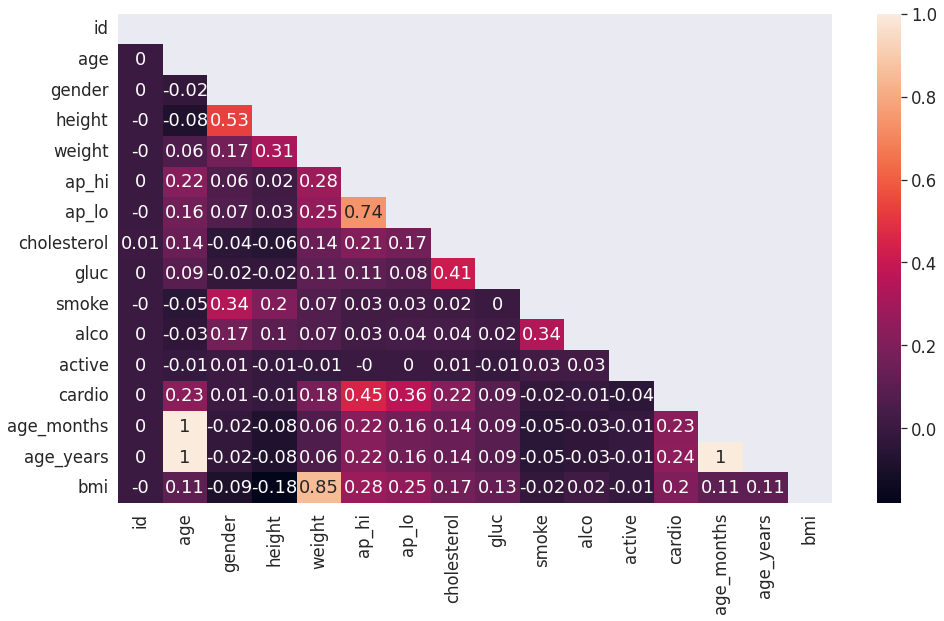

In [35]:
plt.figure(figsize=(16, 9))

mask = np.zeros(df.corr().shape, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(np.round(df.corr(method='spearman'),2), mask=mask, annot=True)

**Question 2.2. (1 point).** Which pair of features has the strongest Spearman correlation?

1. Height, Weight
2. Age, Weight
3. Cholesterol, Gluc
4. Cardio, Cholesterol
5. Ap_hi, Ap_lo
6. Smoke, Alco

Systolic and diastolic blood pressure have the strongest Spearman correlation

**Question 2.3. (1 point).** Why do these features have strong rank correlation?

1. Inaccuracies in the data (data acquisition errors).
2. Relation is wrong, these features should not be related.
3. Nature of the data.

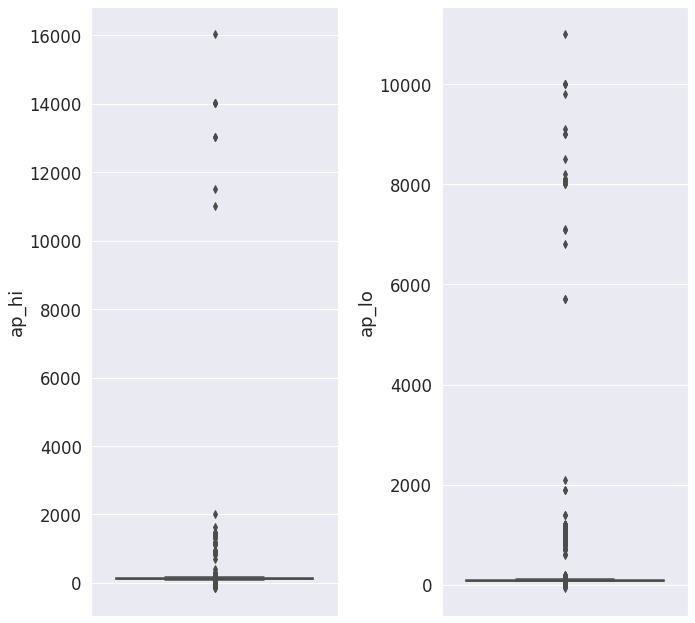

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 9))
sns.boxplot(y='ap_hi', data=df, ax=ax[0])
sns.boxplot(y='ap_lo', data=df, ax=ax[1])
plt.tight_layout()

We can see that our data has a lot of outliers so we can assume that the reason of this correlation is **inaccuracies in the data**

## 2.4. Age

Previously, we calculated the age of the respondents in years at the moment of examination.

### Task:

Create a *count plot* using [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) with the age on the *X* axis and the number of people on the *Y* axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each *cardio* class of that age.

<AxesSubplot:xlabel='age_years', ylabel='count'>

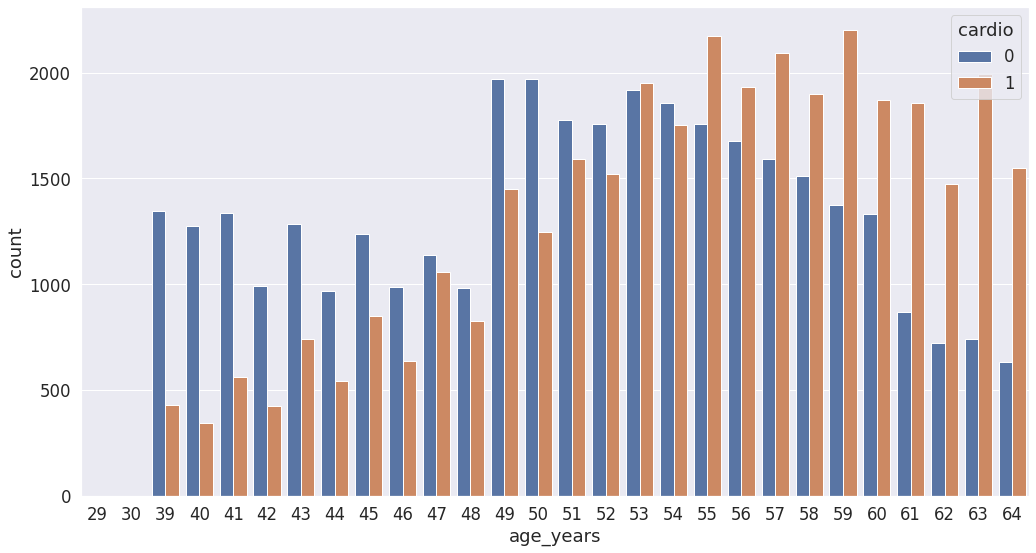

In [37]:
# You code here
plt.figure(figsize=(17, 9))
sns.countplot(x='age_years', hue='cardio', data=df)

**Question 2.4. (1 point).** What is the smallest age at which the number of people with CVD outnumber the number of people without CVD?

1. 44
2. 55
3. 64
4. 70

The smallest age at which the number of people with CVD out the number of people without CVD is 53 (but only 55 is present in answer options)